In [1]:
'''Code to view category prevalence'''
import os
import pandas as pd

data_dir = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(data_dir, 'metadata'))
df.dx.value_counts()/df.shape[0]

nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: dx, dtype: float64

In [2]:
'''Code to create labels.csv'''
def label_to_category(label, categories):
    if label not in categories: return [0]
    else: return [categories.index(label)+1]

data_dir = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(data_dir, 'metadata'))
categories = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
categories = ['bkl', 'nv', 'mel'] # categories based off prevalence
df['label'] = df['dx'].apply(lambda label: label_to_category(label, categories))
df['path'] = df['image_id'].apply(lambda image_id: os.path.join(data_dir, 'images/{}.jpg'.format(image_id)))
temp_df = df[['lesion_id', 'label', 'path']].set_index('lesion_id')
temp_df.to_csv(os.path.join(data_dir, 'labels.csv'))
temp_df.head()

,label,path
lesion_id,,
HAM_0000118,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0000118,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0001466,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...


In [8]:
import sys
sys.path.append('../src/')
import pandas as pd
import numpy as np

def load_experiment(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    if 'train_auroc' in df.columns:
        df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    if 'train_BA' in df.columns:
        df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
        df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    if 'lrs' in df.columns:
        df.lrs = df.lrs.apply(lambda string: np.fromstring(string[1:-1], sep=', '))
    return df

df = load_experiment('/cluster/home/eharve06/bdl-transfer-learning/checkpoints/model_history.csv')
df.tail()

,epoch,train_loss,train_auroc,train_bma_auroc,val_loss,val_auroc,val_bma_auroc,test_loss,test_auroc,test_bma_auroc,lrs
24,25,0.140173,"[1.0, 0.99931379, 0.99528513, 1.0]","[0.0, 0.0, 0.0, 0.0]",2.153458,"[0.97540107, 0.66666667, 0.8980279, 0.84534884]","[0.0, 0.0, 0.0, 0.0]",2.570375,"[0.90348837, 0.76190476, 0.79248047, 0.7872093]","[0.0, 0.0, 0.0, 0.0]","[0.2655595044251195, 0.26440827753866586, 0.26..."
25,26,0.072194,"[1.0, 0.99984595, 0.98699232, 1.0]","[0.0, 0.0, 0.0, 0.0]",1.824303,"[0.97112299, 0.68154762, 0.9023569, 0.83372093]","[0.0, 0.0, 0.0, 0.0]",2.552111,"[0.92674419, 0.76686508, 0.79541016, 0.79767442]","[0.0, 0.0, 0.0, 0.0]","[0.24985583734950995, 0.24870254189812055, 0.2..."
26,27,0.023725,"[1.0, 1.0, 0.99534532, 1.0]","[0.0, 0.0, 0.0, 0.0]",1.821361,"[0.97540107, 0.65873016, 0.91101491, 0.83488372]","[0.0, 0.0, 0.0, 0.0]",2.335165,"[0.92790698, 0.77777778, 0.80566406, 0.82906977]","[0.0, 0.0, 0.0, 0.0]","[0.23415273963568625, 0.2330019304909292, 0.23..."
27,28,0.028247,"[1.0, 1.0, 0.9974854, 1.0]","[0.0, 0.0, 0.0, 0.0]",2.018293,"[0.97433155, 0.6656746, 0.90572391, 0.83837209]","[0.0, 0.0, 0.0, 0.0]",2.253459,"[0.90930233, 0.81845238, 0.80859375, 0.8255814]","[0.0, 0.0, 0.0, 0.0]","[0.21851222973106352, 0.2173684519449871, 0.21..."
28,29,0.012712,"[1.0, 1.0, 0.99693701, 1.0]","[0.0, 0.0, 0.0, 0.0]",1.927398,"[0.97219251, 0.6577381, 0.9023569, 0.84418605]","[0.0, 0.0, 0.0, 0.0]",2.305917,"[0.90697674, 0.79365079, 0.80371094, 0.8127907]","[0.0, 0.0, 0.0, 0.0]","[0.20299607889623883, 0.20186384975095983, 0.2..."


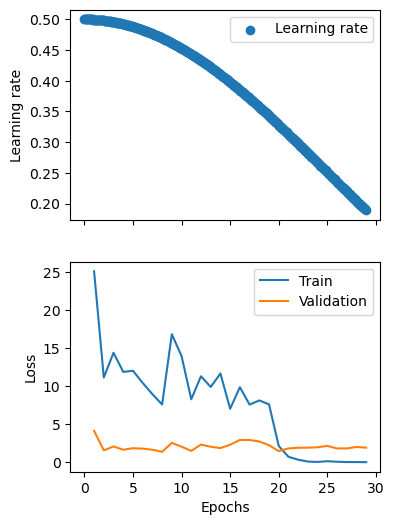

In [9]:
import matplotlib.pyplot as plt
lrs = np.array(df.lrs.to_list()).ravel()
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(4, 6), sharex=True)
np.array(axs).flatten()[0]\
.scatter(np.linspace(0, np.max(df.epoch.to_list()), len(lrs)), lrs, label='Learning rate')
np.array(axs).flatten()[0]\
.set_ylabel('Learning rate')
np.array(axs).flatten()[0]\
.legend()
np.array(axs).flatten()[1]\
.plot(df.epoch.to_list(), df.train_loss.to_list(), label='Train')
np.array(axs).flatten()[1]\
.plot(df.epoch.to_list(), df.val_loss.to_list(), label='Validation')
np.array(axs).flatten()[1]\
.set_ylabel('Loss')
np.array(axs).flatten()[1]\
.legend()
np.array(axs).flatten()[-1]\
.set_xlabel('Epochs')
plt.show()

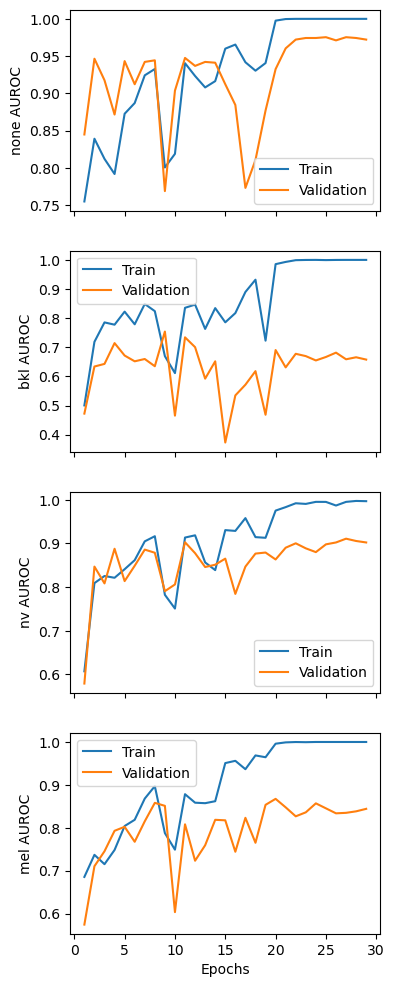

In [10]:
labels = ['none', 'bkl', 'nv', 'mel']
num_labels = len(labels)
fig, axs = plt.subplots(ncols=1, nrows=num_labels, figsize=(4, num_labels*3), sharex=True)
for label_index in range(num_labels):
    np.array(axs).flatten()[label_index]\
    .plot(df.epoch.to_list(), np.array(df.train_auroc.to_list())[:,label_index], label='Train')
    np.array(axs).flatten()[label_index]\
    .plot(df.epoch.to_list(), np.array(df.val_auroc.to_list())[:,label_index], label='Validation')
    np.array(axs).flatten()[label_index]\
    .set_ylabel('{} AUROC'.format(labels[label_index]))
    np.array(axs).flatten()[label_index]\
    .legend()
np.array(axs).flatten()[-1]\
.set_xlabel('Epochs')
plt.show()